In [2]:
import numpy as np 
# notice the abreviation, this is how you should always import numpy.
# Its the standard way to import numpy.

# Tutorial 3 Notebook
## Data Structures in Python - NumPy

What is NumPy? NumPy is a great math library for Python that adds in vector operations and multi-dimensional arrays. There are some great linear algebra tools that are wrapped up in this library. This library has become a standard in the Python scientific stack because of its speed for computations. If you have a peice of code running fairly slow, chances are there are some tweaks you can make to your code to take better advantage of NumPy's vector operations.

Looping through a NumPy object, while tempting, is usually pretty slow. Sometimes it will be acceptable but it just isn't scalable as you look at bigger and bigger datasets.

The documentation for NumPy can be found at https://docs.scipy.org/doc/numpy/reference/

## Arrays
Let's compare a simple array with Python's inbuilt list!

In [41]:
myList = [1,2,3,4,5]
myArray = np.array(myList)

print(myList)
print(myArray)

[1, 2, 3, 4, 5]
[1 2 3 4 5]


They look like their identical (minus the commas), what gives!? Let's add 1 to each element and time them with Jupyter Magics to see the difference.

In [42]:
%%timeit
myList = [1,2,3,4,5] # need to redeclare for timing purposes
myList = [i+1 for i in myList]

1.07 µs ± 327 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [43]:
%timeit myArray + 1

1.46 µs ± 186 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Okay, so that didn't quite work. In this example, the list addition was actually faster than the array addition. Let's try it with a much bigger list and array.

In [6]:
# I had preciously attempted to allocate a list of this size, it just wasn't going to work.
myArray = np.array(list(range(0,1000000,1)))

In [7]:
%timeit myArray + 1

5.04 ms ± 37.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


While timewise, this may not appear to be all that impressive, this literally was not possible with a list. Attempting to allocate a list of this size would run my laptop out of memory (My current set up has about 8gb.) If I were to allocate a list this big, it likely wouldn't perform this well.

In [9]:
%%timeit
myList = list(range(0,1000,1))
myList = [i+1 for i in myList]

140 µs ± 1.41 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
myArray = np.array(list(range(0,1000,1)))
%timeit myArray + 1

3.4 µs ± 141 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## That's more like it!
Notice how much faster this numpy array is. When the list is very small, numpy has too much overhead to perform better but as the lists become bigger, numpy will be the clear winner.

## Multi-dimensional NumPy Arrays? How do we work with them?

In [18]:
multiArray = np.array([[1,2,3],[4,5,6], [7,8,9]])
print(multiArray)

print("Let's grab a value from the second row and third column. Keep in mind, Python still uses a 0 based index.")
print(multiArray[1,2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Let's grab a value from the second row and third column. Keep in mind, Python still uses a 0 based index.
6


How can we get information about our array?

In [23]:
print('Your array has the following shape: ' + str(np.shape(multiArray) ) )
print('The min is: ' + str(multiArray.min() ) )
print('The max is: ' + str(multiArray.max() ) )

Your array has the following shape: (3, 3)
The min is: 1
The max is: 9


In [33]:
print('The sum of the columns is: ' + str(multiArray.sum(axis = 0) ) )
print('The sum of the rows is: ' + str(multiArray.sum(axis = 1) ) )

The sum of the columns is: [12 15 18]
The sum of the rows is: [ 6 15 24]


## How about a more visual example?
If you're more into visual examples, you're in luck! Pictures are basically matrices or numpy arrays of pixel values.
You can think of images as having 3 dimensions. X, Y, and RGB are the three dimensions represented in an image. Let's read one in and start toying with it!

The source for visualizing numpy operations with an image came from this Youtube video: https://www.youtube.com/watch?v=xECXZ3tyONo

In [36]:
from matplotlib import pyplot as plt

Our confused furry friend here has a shape of: (290, 455, 3) and has a data type of: uint8


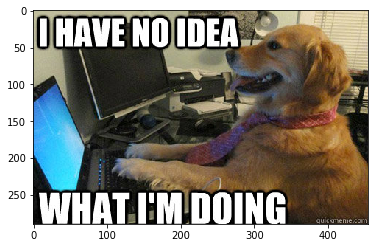

In [49]:
dog = plt.imread('./noIdea_dog.jpg')
plt.imshow(dog)
print('Our confused furry friend here has a shape of: ' + str(np.shape(dog) ) + ' and has a data type of: ' + str(dog.dtype) )

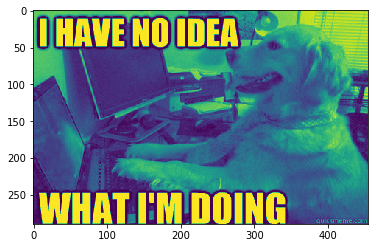

In [83]:
# Let's try to isolate a color channel!
dogR = dog[:,:,0]
plt.imshow(dogR)

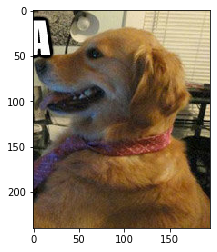

In [95]:
# What about cropping the image? Yep, you bet we can do that too!
plt.imshow(dog[0:240,260:,:])